In [36]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Percentiles ##

Definition: Let p be a number between 0 and 100. The pth percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values.

In [37]:
arr = make_array(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [38]:
# returns 2 because
#   2 is at least as large as 20% of the items in arr
#   2 is the smallest value for which this is true
percentile(20, arr)

2

In [39]:
# returns 3 because
#   3 is at least as large as 20% of the items in arr
#   3 is the smallest value for which this is true
percentile(30, arr)

3

In [40]:
# returns 3 because
#   3 is at least as large as 25% of the items in arr
#   3 is the smallest value for which this is true
percentile(25, arr)

3

## Discussion Question


In [41]:
arr2 = make_array(1, 3, 5, 7, 9)

In [42]:
# What will the following commands return?

In [43]:
# This is called the first quartile
percentile(25, arr2)

3

In [44]:
# This is called the second quartile,
# but more commonly known as the median
percentile(50, arr2)

5

In [45]:
# This is called the third quartile
percentile(75, arr2)

7

## Inference: Estimation

 Below is a table of 45,000 randomly sampled San Francisco employees.

In [46]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


In [47]:
full_pop = percentile(50, sf.column("Total Compensation"))
full_pop

121630.0

In [48]:
# Filter out people working less than part time.

min_salary = 15 * 20 * 50 # $15/hr, 20 hr/wk, 50 weeks
sf = sf.where('Salary', are.above(min_salary))
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


### Population Distribution

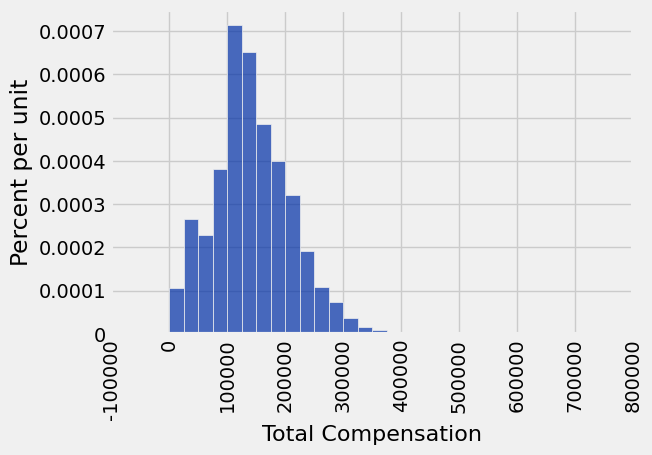

In [49]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)


**Question:** What was the median salary in San Francisco in 2019?

In [50]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

That's the median of *our sample*. What is the median of the entire population?

# Bootstrap

In the bootstrap technique, we:
 - sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

Default behavior of `tbl.sample`: at random with replacement, the same number of times as rows of `tbl`

134958.0

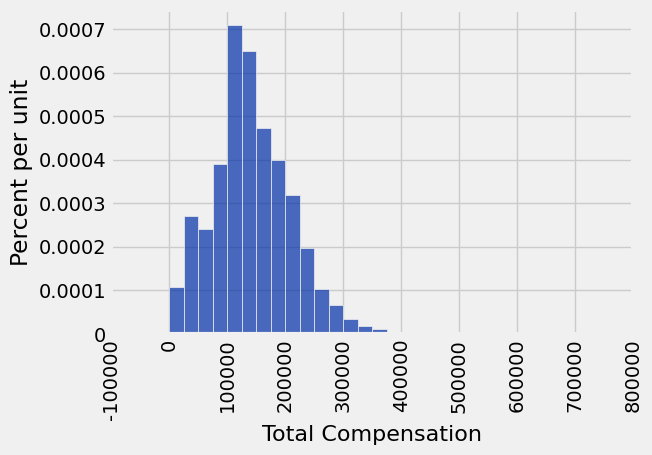

In [51]:
bootstrap_sample = sf.sample() # draw a new sample of the same size based on our data
bootstrap_sample.hist('Total Compensation', bins=sf_bins)
percentile(50, bootstrap_sample.column('Total Compensation')) # compute the median of the new sample

In [52]:
def one_bootstrap_median():
    bootstrap_sample = sf.sample()
    return percentile(50, bootstrap_sample.column('Total Compensation'))

In [53]:
one_bootstrap_median()

135895.0

In [62]:
bootstrap_medians = make_array()
for i in np.arange(500):
    bootstrap_medians = np.append(bootstrap_medians, one_bootstrap_median())
bootstrap_medians

array([ 136332.,  135748.,  135369.,  136174.,  136129.,  136160.,
        136119.,  135511.,  136284.,  136183.,  135589.,  136048.,
        136304.,  136930.,  135097.,  136018.,  136780.,  135498.,
        135196.,  136316.,  136338.,  136716.,  135659.,  135884.,
        135393.,  135527.,  135633.,  135487.,  136196.,  136315.,
        136633.,  136119.,  135752.,  136345.,  135710.,  135782.,
        135179.,  135369.,  135180.,  136074.,  135722.,  136059.,
        136353.,  135675.,  136021.,  135489.,  134940.,  136486.,
        136326.,  135542.,  135722.,  136060.,  135511.,  135401.,
        136305.,  135421.,  136615.,  135768.,  136217.,  135664.,
        135578.,  136282.,  135194.,  135195.,  136025.,  136870.,
        135585.,  135747.,  135272.,  135772.,  135777.,  136213.,
        135255.,  135545.,  135771.,  135509.,  135177.,  135906.,
        135770.,  135652.,  136369.,  135287.,  136092.,  135772.,
        135652.,  135398.,  135793.,  136059.,  134894.,  1356

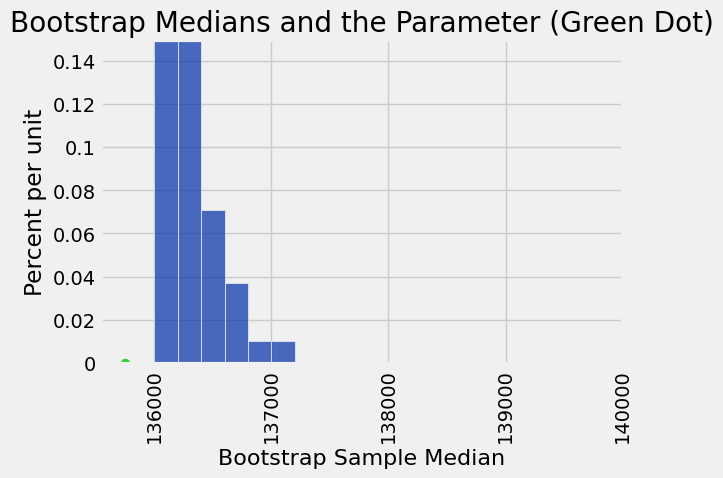

In [63]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_medians)

median_bins=np.arange(136000, 140000, 200)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.0015)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [64]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

make_array(left, right)

array([ 134963.,  136633.])

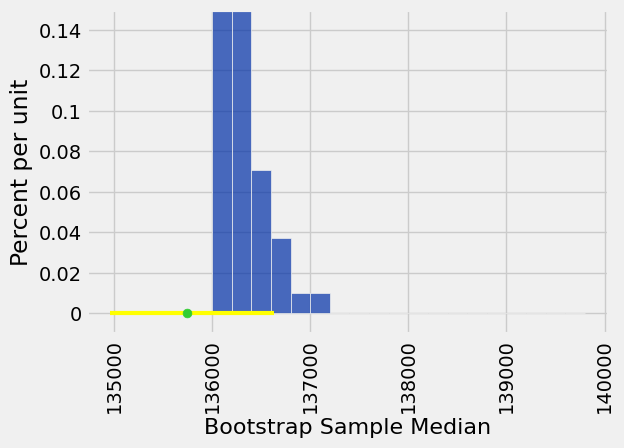

In [65]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.0001, 0.0015)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

This is called a **confidence interval**. In 95% of simulations, the median fell between these two values.

"We are 95% confident that the median salary of the entire population is between these two values."
